<a href="https://colab.research.google.com/github/Mahislam1/Machine-and-Deep-Learning-projects/blob/main/TB_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Tuberculosis images: 700
Normal images: 3500
(3500, 4)
(700, 4)


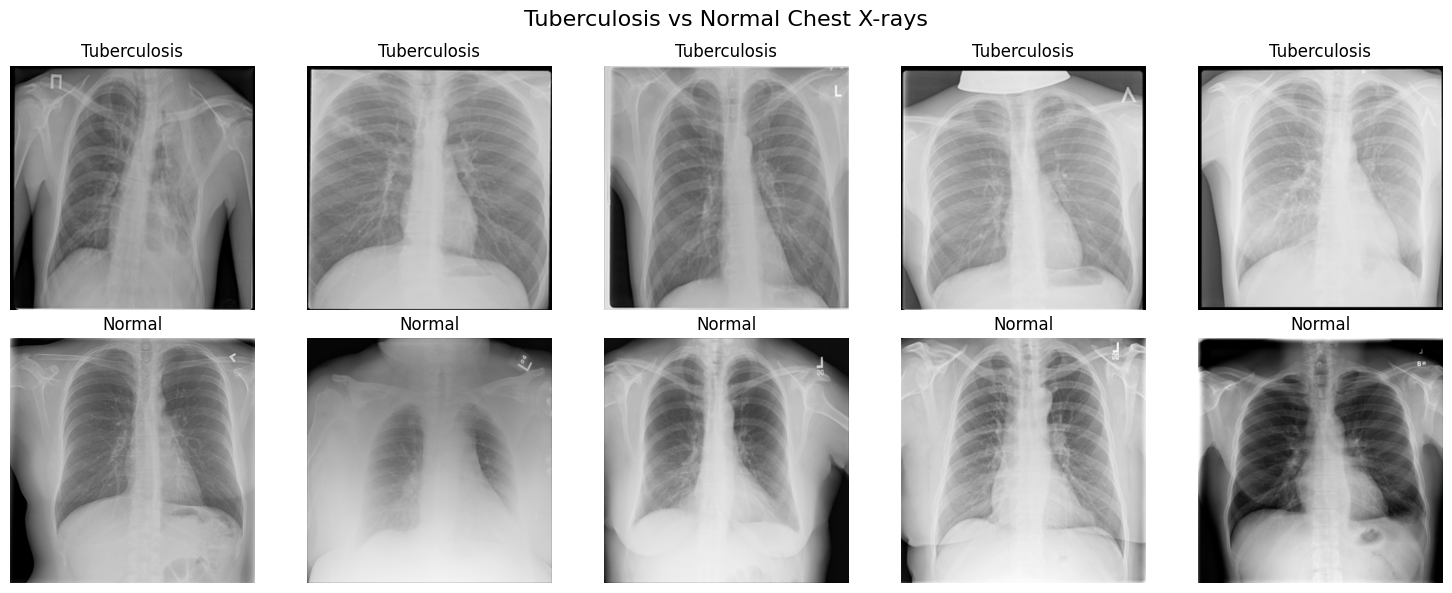

Class: Tuberculosis | Existing Images: 700
Generated 1300 images for class Tuberculosis. Final total: 2000
Class: Normal | Existing Images: 3500
Skipping augmentation for Normal, already has 3500 images.
Found 4400 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 795ms/step - accuracy: 0.6919 - loss: 0.6046 - precision: 0.5818 - recall: 0.7120 - val_accuracy: 0.8975 - val_loss: 0.2338 - val_precision: 1.0000 - val_recall: 0.7143 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 754ms/step - accuracy: 0.9402 - loss: 0.1869 - precision: 0.8855 - recall: 0.9618 - val_accuracy: 0.9438 - val_loss: 0.1480 - val_precision: 1.0000 - val_recall: 0.8387 - learning_rate: 1.0000e-04
Epoch 3/10
 75/100 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step - accuracy: 0.9654 - loss: 0.0950 - precision: 0.9461 - recall: 0.9643

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - accuracy: 0.9634 - loss: 0.1007 - precision: 0.9419 - recall: 0.9624 - val_accuracy: 0.9712 - val_loss: 0.0968 - val_precision: 1.0000 - val_recall: 0.9179 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 751ms/step - accuracy: 0.9642 - loss: 0.1185 - precision: 0.9478 - recall: 0.9542 - val_accuracy: 0.9812 - val_loss: 0.0669 - val_precision: 1.0000 - val_recall: 0.9451 - learning_rate: 1.0000e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 755ms/step - accuracy: 0.9736 - loss: 0.0681 - precision: 0.9722 - recall: 0.9614 - val_accuracy: 0.9800 - val_loss: 0.0564 - val_precision: 1.0000 - val_recall: 0.9459 - learning_rate: 1.0000e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 638ms/step - accuracy: 0.9722 - loss: 0.0959 - precision: 0.9441 - recall: 0.9800 - val_accuracy: 0.9825 - val_loss: 0.0523 - val_precision: 1.0000 - val_recall: 0.9538 - learning_rate: 1.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 797

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras import layers as tfl
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Define data path
data_path = "/content/gdrive/MyDrive/data/TB_Data/TB_Chest_Radiography_Database"

# Labels
labels = ['Tuberculosis', 'Normal']

# Define the count for each class
tuberculosis_count = len(os.listdir(f"{data_path}/{labels[0]}"))
normal_count = len(os.listdir(f"{data_path}/{labels[1]}"))

print(f"Tuberculosis images: {tuberculosis_count}")
print(f"Normal images: {normal_count}")

# Load metadata
normal_df = pd.read_excel(f"{data_path}/Normal.metadata.xlsx")
print(normal_df.shape)
normal_df.head()

tuber_df = pd.read_excel(f"{data_path}/Tuberculosis.metadata.xlsx")
print(tuber_df.shape)
tuber_df.head()

# Function to get 5 sample images from each class
def get_sample_images(label, num_samples=5):
    image_files = os.listdir(os.path.join(data_path, label))[:num_samples]
    image_paths = [os.path.join(data_path, label, img) for img in image_files]
    return image_paths

# Get sample images
tb_images = get_sample_images(labels[0])
normal_images = get_sample_images(labels[1])

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Tuberculosis vs Normal Chest X-rays", fontsize=16)

for i in range(5):
    # Tuberculosis images
    img_tb = Image.open(tb_images[i])
    axes[0, i].imshow(img_tb, cmap='gray')
    axes[0, i].axis("off")
    axes[0, i].set_title("Tuberculosis")

    # Normal images
    img_normal = Image.open(normal_images[i])
    axes[1, i].imshow(img_normal, cmap='gray')
    axes[1, i].axis("off")
    axes[1, i].set_title("Normal")

plt.tight_layout()
plt.show()

# Define the data augmentation setup with reduced transformations to optimize memory usage
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Reduced rotation range to avoid overloading memory
    height_shift_range=0.1,  # Reduced shift range
    zoom_range=0.1,  # Reduced zoom range
    horizontal_flip=True,
    fill_mode="nearest"
)

# Paths and parameters for saving augmented images
save_path = "/content/splited_data"
os.makedirs(save_path, exist_ok=True)
max_images = 2000  # Total images per class (Reducing to prevent excessive memory usage)
target_size = (224, 224)

# Generate images for augmentation
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith(('jpg', 'png', 'jpeg'))]) if os.path.exists(folder) else 0

for label in labels:
    class_path = os.path.join(data_path, label)  # Original images
    save_class_path = os.path.join(save_path, label)  # Augmented + original images
    os.makedirs(save_class_path, exist_ok=True)

    # Copy original images to the new folder
    original_files = [f for f in os.listdir(class_path) if f.endswith(('jpg', 'png', 'jpeg'))]
    for file in original_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(save_class_path, file)
        if not os.path.exists(dest_path):  # Avoid duplicate copying
            os.system(f"cp '{src_path}' '{dest_path}'")  # Copies the original images

    existing_count = count_images(save_class_path)  # Count existing images
    print(f"Class: {label} | Existing Images: {existing_count}")

    # If enough images exist, skip augmentation
    if existing_count >= max_images:
        print(f"Skipping augmentation for {label}, already has {existing_count} images.")
        continue

    # Number of images to generate
    images_needed = max_images - existing_count
    img_index = 0

    # Augment images to balance dataset
    for img_file in original_files:
        if img_index >= images_needed:
            break  # Stop when enough images are generated

        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Create augmented images
        gen = datagen.flow(img_array, batch_size=1)
        for _ in range(10):  # Generate multiple images per original image
            if img_index >= images_needed:
                break
            batch = next(gen)
            aug_img = batch[0] * 255
            aug_img = np.clip(aug_img, 0, 255).astype('uint8')

            # Save augmented image
            aug_img_path = os.path.join(save_class_path, f"{label}_aug_{img_index}.jpg")
            tf.keras.preprocessing.image.save_img(aug_img_path, aug_img)
            img_index += 1

    print(f"Generated {img_index} images for class {label}. Final total: {count_images(save_class_path)}")

# Define ImageDataGenerator with ResNet preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 preprocessing
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Only preprocessing, no augmentation
)

# Create train and validation generators for ResNet and EfficientNet
train_generator_resnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size to fit in memory
    class_mode="binary",  # Use "binary" since we have two classes
    subset="training",
    shuffle=True
)

val_generator_resnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size for validation
    class_mode="binary",
    subset="validation",
    shuffle=True
)

train_generator_efficientnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size to fit in memory
    class_mode="binary",  # Use "binary" since we have two classes
    subset="training",
    shuffle=True
)

val_generator_efficientnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size for validation
    class_mode="binary",
    subset="validation",
    shuffle=True
)

# Load ResNet50 and EfficientNetB0
base_model_resnet = ResNet50(weights='imagenet', include_top=False)
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False)

# Freeze base models
base_model_resnet.trainable = False
base_model_efficientnet.trainable = False

# Add custom classification layers for ResNet50
x_resnet = GlobalAveragePooling2D()(base_model_resnet.output)
x_resnet = Dense(256, activation='relu')(x_resnet)
x_resnet = BatchNormalization()(x_resnet)
x_resnet = Dropout(0.4)(x_resnet)
x_resnet = Dense(128, activation='relu')(x_resnet)
x_resnet = BatchNormalization()(x_resnet)
x_resnet = Dropout(0.4)(x_resnet)
output_resnet = Dense(1, activation='sigmoid')(x_resnet)

# Compile ResNet50 model
resnet_model = Model(inputs=base_model_resnet.input, outputs=output_resnet)
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'recall', 'precision'])

# Train ResNet50 model
history_resnet = resnet_model.fit(
    train_generator_resnet,
    validation_data=val_generator_resnet,
    epochs=10,
    steps_per_epoch=100,  # Reduced steps per epoch to optimize memory
    validation_steps=50,  # Reduced validation steps
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
               ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)]
)

# Evaluate ResNet50
test_loss_resnet, test_acc_resnet, test_prec_resnet, test_rec_resnet = resnet_model.evaluate(val_generator_resnet)
print(f"ResNet50 - Test Accuracy: {test_acc_resnet:.4f}\nTest Loss: {test_loss_resnet:.4f}\nTest Precision: {test_prec_resnet:.4f}\nTest Recall: {test_rec_resnet:.4f}")

# Add custom classification layers for EfficientNetB0
x_efficientnet = GlobalAveragePooling2D()(base_model_efficientnet.output)
x_efficientnet = Dense(256, activation='relu')(x_efficientnet)
x_efficientnet = BatchNormalization()(x_efficientnet)
x_efficientnet = Dropout(0.4)(x_efficientnet)
x_efficientnet = Dense(128, activation='relu')(x_efficientnet)
x_efficientnet = BatchNormalization()(x_efficientnet)
x_efficientnet = Dropout(0.4)(x_efficientnet)
output_efficientnet = Dense(1, activation='sigmoid')(x_efficientnet)

# Compile EfficientNetB0 model
efficientnet_model = Model(inputs=base_model_efficientnet.input, outputs=output_efficientnet)
efficientnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='binary_crossentropy',
                           metrics=['accuracy', 'recall', 'precision'])

# Train EfficientNetB0 model
history_efficientnet = efficientnet_model.fit(
    train_generator_efficientnet,
    validation_data=val_generator_efficientnet,
    epochs=10,
    steps_per_epoch=100,  # Reduced steps per epoch to optimize memory
    validation_steps=50,  # Reduced validation steps
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
               ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)]
)

# Evaluate EfficientNetB0
test_loss_efficientnet, test_acc_efficientnet, test_prec_efficientnet, test_rec_efficientnet = efficientnet_model.evaluate(val_generator_efficientnet)
print(f"EfficientNetB0 - Test Accuracy: {test_acc_efficientnet:.4f}\nTest Loss: {test_loss_efficientnet:.4f}\nTest Precision: {test_prec_efficientnet:.4f}\nTest Recall: {test_rec_efficientnet:.4f}")


In [ ]:
# Generate predictions for ResNet50
y_true_resnet = val_generator_resnet.classes  # True labels
y_pred_resnet = resnet_model.predict(val_generator_resnet, steps=len(val_generator_resnet), verbose=1)
y_pred_resnet = (y_pred_resnet > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification report for ResNet50
from sklearn.metrics import classification_report
report_resnet = classification_report(y_true_resnet, y_pred_resnet)
print("Classification Report for ResNet50:\n", report_resnet)

# Generate predictions for EfficientNetB0
y_true_efficientnet = val_generator_efficientnet.classes  # True labels
y_pred_efficientnet = efficientnet_model.predict(val_generator_efficientnet, steps=len(val_generator_efficientnet), verbose=1)
y_pred_efficientnet = (y_pred_efficientnet > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification report for EfficientNetB0
report_efficientnet = classification_report(y_true_efficientnet, y_pred_efficientnet)
print("Classification Report for EfficientNetB0:\n", report_efficientnet)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 35s 500ms/step
Classification Report for ResNet50:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64       700
           1       0.36      0.35      0.36       400

    accuracy                           0.54      1100
   macro avg       0.50      0.50      0.50      1100
weighted avg       0.54      0.54      0.54      1100



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step
Classification Report for EfficientNetB0:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63       700
           1       0.34      0.32      0.33       400

    accuracy                           0.53      1100
   macro avg       0.48      0.48      0.48      1100
weighted avg       0.52      0.53      0.52      1100



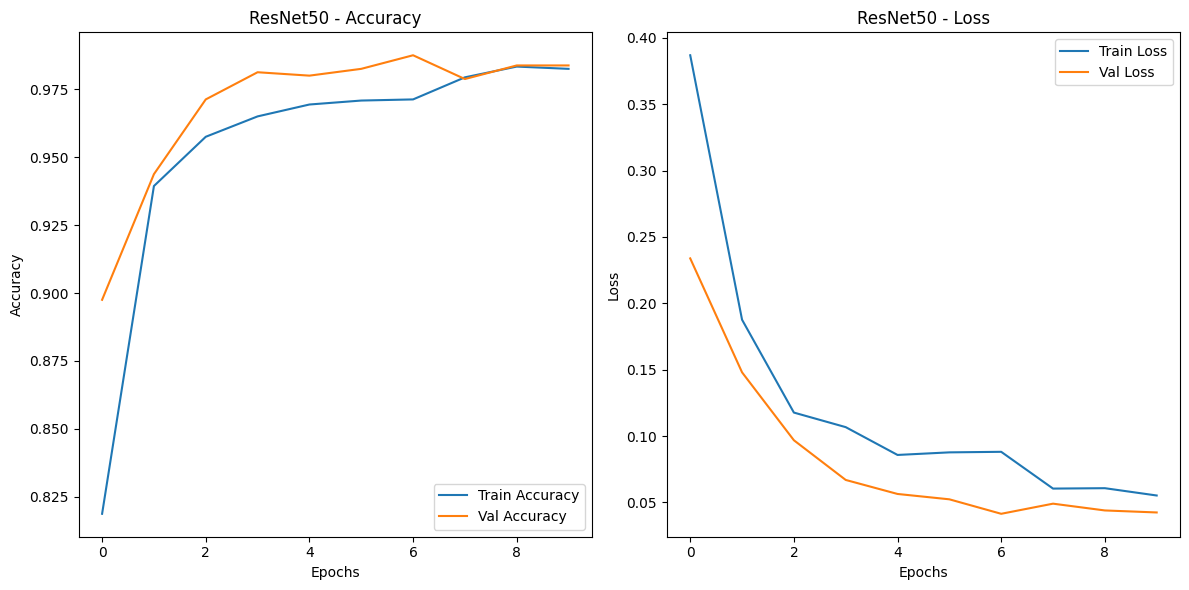

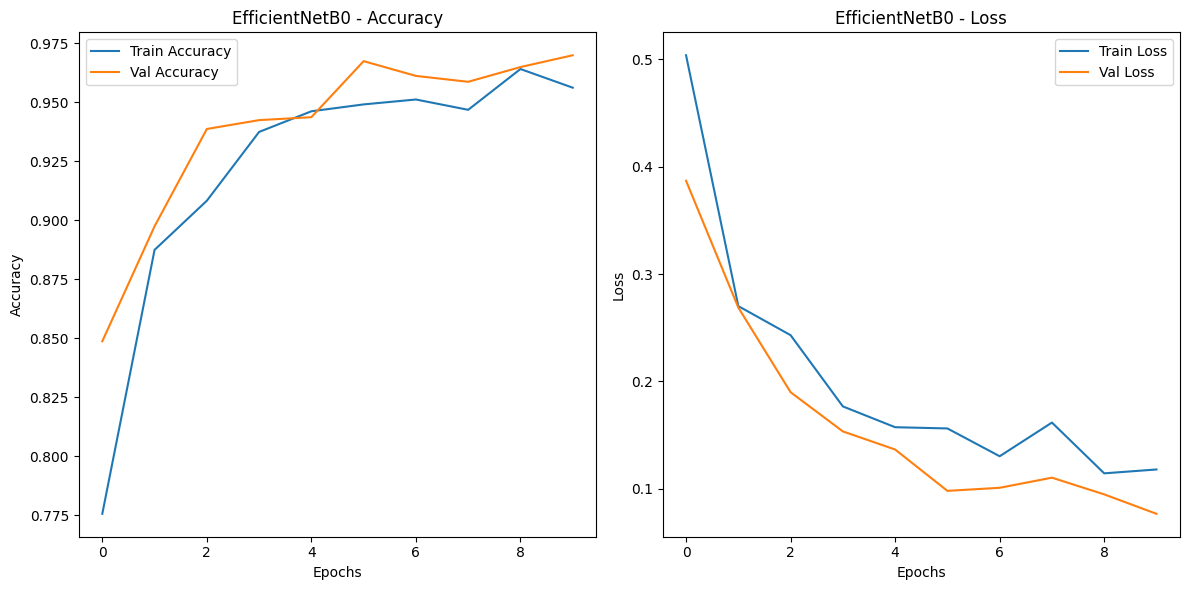

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, model_name):
    # Plotting accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function for both models after training
plot_metrics(history_resnet, 'ResNet50')
plot_metrics(history_efficientnet, 'EfficientNetB0')


69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 495ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step


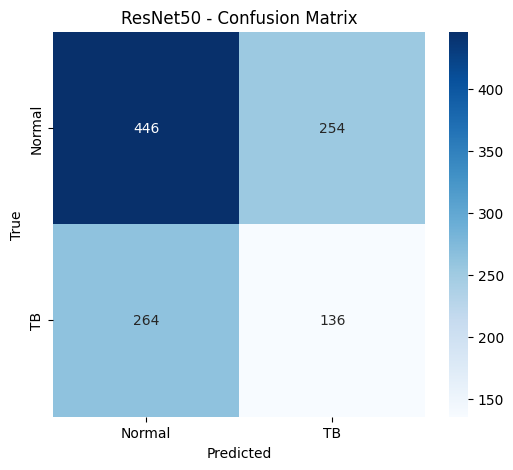

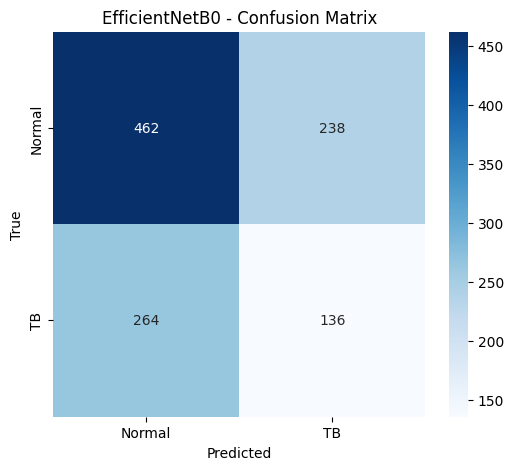

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "TB"], yticklabels=["Normal", "TB"])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Get true labels and predictions
y_true_resnet = val_generator_resnet.classes
y_pred_resnet = (resnet_model.predict(val_generator_resnet) > 0.5).astype(int)

y_true_efficientnet = val_generator_efficientnet.classes
y_pred_efficientnet = (efficientnet_model.predict(val_generator_efficientnet) > 0.5).astype(int)

# Plot confusion matrices for both models
plot_confusion_matrix(y_true_resnet, y_pred_resnet, 'ResNet50')
plot_confusion_matrix(y_true_efficientnet, y_pred_efficientnet, 'EfficientNetB0')


In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras import layers as tfl
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report

# Define dual input generator
def dual_input_generator(generator1, generator2):
    while True:
        # Get the next batch from both generators
        data1 = next(generator1)
        data2 = next(generator2)

        # Ensure the outputs are aligned and return as tf.Tensors
        # The output should be a tuple of inputs and the target
        inputs = (tf.convert_to_tensor(data1[0]), tf.convert_to_tensor(data2[0]))
        targets = tf.convert_to_tensor(data1[1])

        # Reshape targets to (batch_size, 1)
        targets = tf.expand_dims(targets, axis=-1)

        # Yield both inputs and targets
        yield inputs, targets

# Define the ensemble model
base_model_resnet = ResNet50(weights='imagenet', include_top=False)
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False)

# Freeze the base models
base_model_resnet.trainable = False
base_model_efficientnet.trainable = False

# Custom classification layers for ResNet50
x_resnet = GlobalAveragePooling2D()(base_model_resnet.output)
x_resnet = Dense(256, activation='relu')(x_resnet)
x_resnet = BatchNormalization()(x_resnet)
x_resnet = Dropout(0.4)(x_resnet)
x_resnet = Dense(128, activation='relu')(x_resnet)
x_resnet = BatchNormalization()(x_resnet)
x_resnet = Dropout(0.4)(x_resnet)
output_resnet = Dense(1, activation='sigmoid')(x_resnet)

# Custom classification layers for EfficientNetB0
x_efficientnet = GlobalAveragePooling2D()(base_model_efficientnet.output)
x_efficientnet = Dense(256, activation='relu')(x_efficientnet)
x_efficientnet = BatchNormalization()(x_efficientnet)
x_efficientnet = Dropout(0.4)(x_efficientnet)
x_efficientnet = Dense(128, activation='relu')(x_efficientnet)
x_efficientnet = BatchNormalization()(x_efficientnet)
x_efficientnet = Dropout(0.4)(x_efficientnet)
output_efficientnet = Dense(1, activation='sigmoid')(x_efficientnet)

# Merge the outputs of both models (using Concatenate)
merged = tfl.Concatenate()([output_resnet, output_efficientnet])
x = Dense(256, activation='relu')(merged)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
ensemble_output = Dense(1, activation='sigmoid')(x)  # Final binary classification output

# Create the ensemble model
ensemble_model = Model(inputs=[base_model_resnet.input, base_model_efficientnet.input], outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'recall', 'precision'])

# Summary of the ensemble model
ensemble_model.summary()

# Define the data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 preprocessing
    validation_split=0.2
)

# Create train and validation generators for ResNet and EfficientNet
train_generator_resnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size to fit in memory
    class_mode="binary",  # Use "binary" since we have two classes
    subset="training",
    shuffle=True
)

val_generator_resnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size for validation
    class_mode="binary",
    subset="validation",
    shuffle=True
)

train_generator_efficientnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size to fit in memory
    class_mode="binary",  # Use "binary" since we have two classes
    subset="training",
    shuffle=True
)

val_generator_efficientnet = train_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,  # Reduced batch size for validation
    class_mode="binary",
    subset="validation",
    shuffle=True
)

# Train the ensemble model using dual input generator
history_ensemble = ensemble_model.fit(
    tf.data.Dataset.from_generator(
        lambda: dual_input_generator(train_generator_resnet, train_generator_efficientnet),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),  # ResNet input
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),  # EfficientNet input
            tf.TensorSpec(shape=(None, 1), dtype=tf.float32)  # Labels (binary classification)
        )
    ),
    validation_data=tf.data.Dataset.from_generator(
        lambda: dual_input_generator(val_generator_resnet, val_generator_efficientnet),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),  # ResNet input
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),  # EfficientNet input
            tf.TensorSpec(shape=(None, 1), dtype=tf.float32)  # Labels (binary classification)
        )
    ),
    epochs=10,
    steps_per_epoch=100,  # Reduced steps per epoch to optimize memory
    validation_steps=50,  # Reduced validation steps
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
               ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)]
)

# Evaluate the ensemble model
# Create test generators with shuffle=False for consistent evaluation
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # Only preprocessing

test_generator_resnet = test_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False # Important for evaluation
)

test_generator_efficientnet = test_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False # Important for evaluation
)

# Calculate the number of steps for evaluation
test_steps = test_generator_resnet.samples // test_generator_resnet.batch_size


test_loss_ensemble, test_acc_ensemble, test_prec_ensemble, test_rec_ensemble = ensemble_model.evaluate(
    tf.data.Dataset.from_generator(
        lambda: dual_input_generator(test_generator_resnet, test_generator_efficientnet),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
        )
    ),
    steps=test_steps # Add steps argument
)

print(f"Ensemble Model - Test Accuracy: {test_acc_ensemble:.4f}")
print(f"Test Loss: {test_loss_ensemble:.4f}")
print(f"Test Precision: {test_prec_ensemble:.4f}")
print(f"Test Recall: {test_rec_ensemble:.4f}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, None,      │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, None,      │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, None,      │          0 │ normalization_1[… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 28,594,214 (109.08 MB)

 Trainable params: 954,627 (3.64 MB)

 Non-trainable params: 27,639,587 (105.44 MB)

Found 4400 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5126 - loss: 1.0608 - precision: 0.3666 - recall: 0.4609 - val_accuracy: 0.6575 - val_loss: 0.6209 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 959ms/step - accuracy: 0.8624 - loss: 0.3482 - precision: 0.8013 - recall: 0.8590 - val_accuracy: 0.6093 - val_loss: 0.5867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 958ms/step - accuracy: 0.9056 - loss: 0.2943 - precision: 0.8216 - recall: 0.9379 - val_accuracy: 0.7952 - val_loss: 0.4009 - val_precision: 1.0000 - val_recall: 0.4199 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 966ms/step - accuracy: 0.9441 - loss: 0.1918 - prec

In [ ]:
# Generate predictions for the ensemble model
y_true_ensemble = test_generator_resnet.classes  # True labels (same for both generators)
y_pred_ensemble = ensemble_model.predict(
    tf.data.Dataset.from_generator(
        lambda: dual_input_generator(test_generator_resnet, test_generator_efficientnet),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
        )
    ),
    steps=test_steps,
    verbose=1
)

# Convert the predictions into binary values (0 or 1)
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

# Slice true labels to match the number of predictions
y_true_ensemble = y_true_ensemble[:len(y_pred_ensemble)]


# Classification report for the ensemble model
report_ensemble = classification_report(y_true_ensemble, y_pred_ensemble)
print("Classification Report for Ensemble Model:\n", report_ensemble)

344/344 ━━━━━━━━━━━━━━━━━━━━ 220s 637ms/step
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3500
           1       0.99      0.98      0.98      2000

    accuracy                           0.99      5500
   macro avg       0.99      0.99      0.99      5500
weighted avg       0.99      0.99      0.99      5500



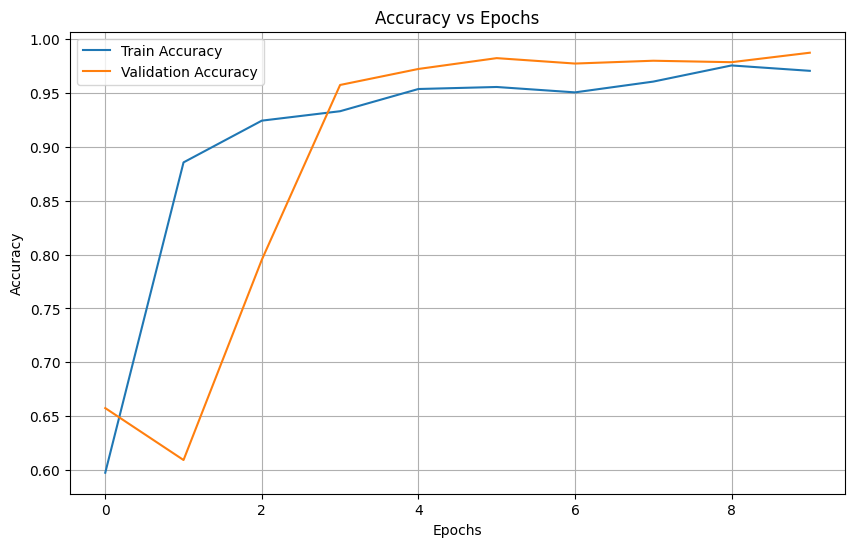

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history_ensemble.history['accuracy'], label='Train Accuracy')
plt.plot(history_ensemble.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

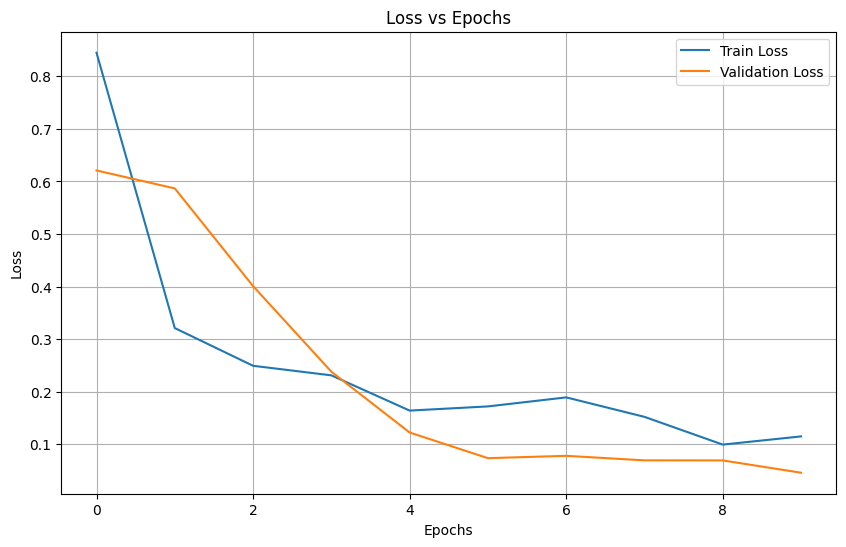

In [ ]:
# Plot Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history_ensemble.history['loss'], label='Train Loss')
plt.plot(history_ensemble.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

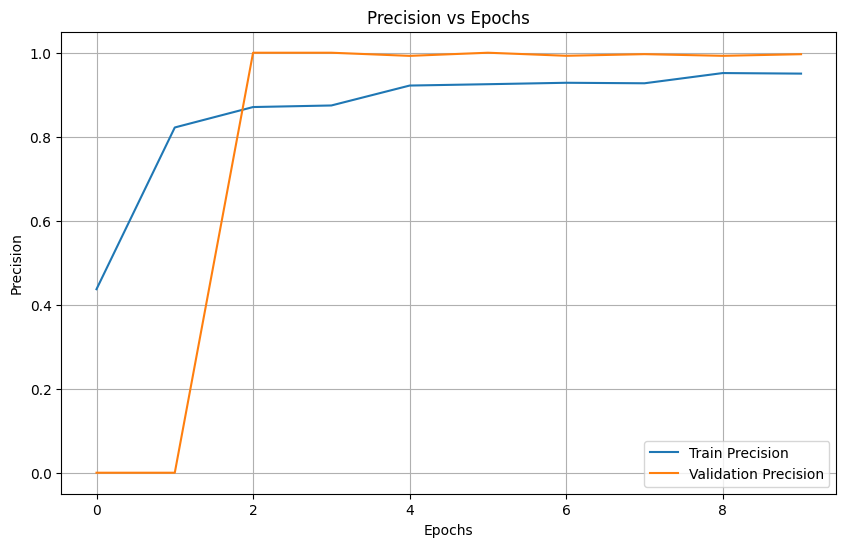

In [ ]:
# Plot Precision vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history_ensemble.history['precision'], label='Train Precision')
plt.plot(history_ensemble.history['val_precision'], label='Validation Precision')
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

Found 5500 images belonging to 2 classes.
Found 5500 images belonging to 2 classes.
344/344 ━━━━━━━━━━━━━━━━━━━━ 223s 647ms/step


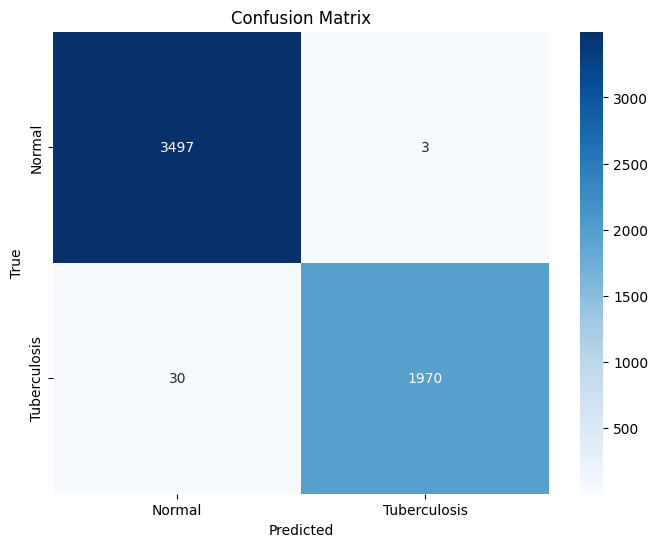

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math

# Create test generators with shuffle=False for consistent evaluation
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # Only preprocessing

test_generator_resnet = test_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False # Important for evaluation
)

test_generator_efficientnet = test_datagen.flow_from_directory(
    save_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False # Important for evaluation
)

# Calculate the number of steps for prediction to include all samples
total_samples = test_generator_resnet.samples
test_steps = math.ceil(total_samples / test_generator_resnet.batch_size)


# Get predictions
predictions = ensemble_model.predict(
    tf.data.Dataset.from_generator(
        lambda: dual_input_generator(test_generator_resnet, test_generator_efficientnet),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
        )
    ),
    steps=test_steps
)

# True labels
true_labels = test_generator_resnet.classes[:len(predictions)] # Slice true labels to match the number of predictions

# Confusion matrix
cm = confusion_matrix(true_labels, predictions > 0.5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator_resnet.class_indices.keys(), yticklabels=test_generator_resnet.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()